In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the excel file
df = pd.read_csv('../csv_files/comp2_working.csv',index_col=0)
df.head(10)

,X1,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs
1,20000,3913,3102,689,0,0,0
2,120000,2682,1725,2682,3272,3455,3261
3,90000,29239,14027,13559,14331,14948,15549
4,50000,46990,48233,49291,28314,28959,29547
5,50000,8617,5670,35835,20940,19146,19131
6,50000,64400,57069,57608,19394,19619,20024
7,500000,367965,412023,445007,542653,483003,473944
8,100000,11876,380,601,221,159,567
9,140000,11285,14096,12108,12211,11793,3719
10,20000,0,0,0,0,13007,13912


### Examining the Features and their Outliers ###

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be17a6f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be1739630>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be17a6e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be1739cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be1747048>],
 'means': []}

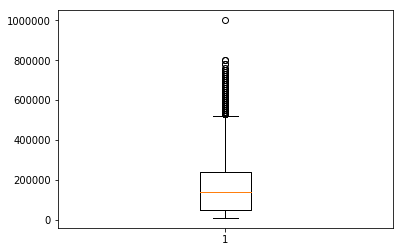

In [3]:
plt.boxplot(df['X1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be16b7ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be16c0278>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be16b7a58>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be16c0908>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be16c0c50>],
 'means': []}

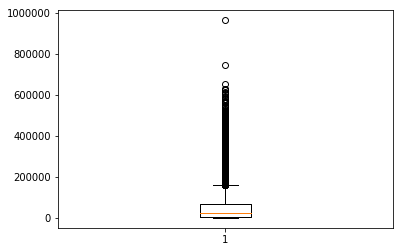

In [4]:
plt.boxplot(df['X12_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be1699710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be1699da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be16995c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be16a5470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be16a57b8>],
 'means': []}

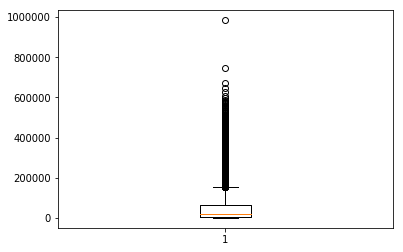

In [5]:
plt.boxplot(df['X13_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be15fa278>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be15fa908>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be15fa128>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be15faf98>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be1606320>],
 'means': []}

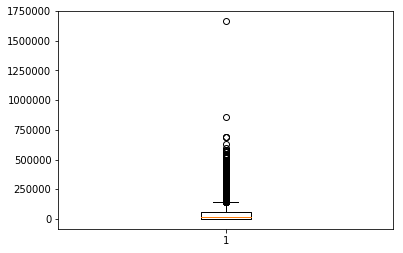

In [6]:
plt.boxplot(df['X14_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be15d91d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be15d9860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be15d9080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be15d9ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be15e3278>],
 'means': []}

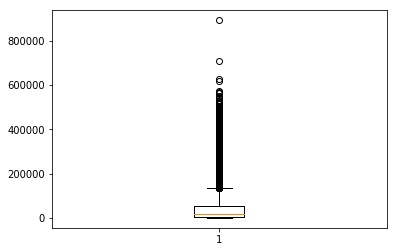

In [7]:
plt.boxplot(df['X15_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be152f518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be152fba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be152f3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be1536278>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be15365c0>],
 'means': []}

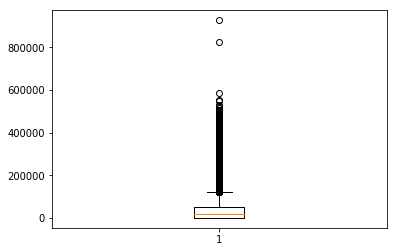

In [8]:
plt.boxplot(df['X16_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be1501860>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be1501ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be1501710>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be150c5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be150c908>],
 'means': []}

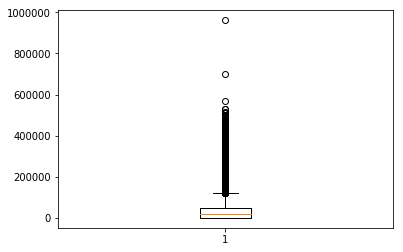

In [9]:
plt.boxplot(df['X17_abs'])

In [10]:
# finding IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X1         190000.00
X12_abs     63531.25
X13_abs     60971.00
X14_abs     57401.75
X15_abs     52158.50
X16_abs     48353.25
X17_abs     47892.25
dtype: float64


In [11]:
# define upper bound
upper = Q3 + 1.5 * IQR
# define lower bound 
lower = Q1 - 1.5 * IQR
# define outlier variable 
# below is equivalent to this formula: outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier = (df < lower) | (df > upper)

# print out the results
# gives the location of the outlier values (indicated by True) based on the bounds defined above 
print(outlier)

          X1  X12_abs  X13_abs  X14_abs  X15_abs  X16_abs  X17_abs
1      False    False    False    False    False    False    False
2      False    False    False    False    False    False    False
3      False    False    False    False    False    False    False
4      False    False    False    False    False    False    False
5      False    False    False    False    False    False    False
6      False    False    False    False    False    False    False
7      False     True     True     True     True     True     True
8      False    False    False    False    False    False    False
9      False    False    False    False    False    False    False
10     False    False    False    False    False    False    False
11     False    False    False    False    False    False    False
12     False    False    False    False    False    False    False
13      True    False    False    False    False    False    False
14     False    False    False    False    False    False    F

In [12]:
# define upper and lower lists
upper = []
lower = []

# create for loop that will iterate over each value in every column
for i in df.columns:
    # define Q1 and Q3 for each column
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    # define IQR for each column
    IQR = Q3 - Q1
    # append empty lists upper and lower
    upper_list = Q3 + 1.5 * IQR
    upper.append(upper_list)
    lower_list = Q1 - 1.5 * IQR
    lower.append(lower_list)

In [13]:
# define the function that will replace outlier values in each column with the appropriate upper or lower limit 
def outlier_handling(x, upper, lower):
    if x > upper:
        x = upper
    elif x < lower:
            x = lower
    else:
        pass
    return x

In [14]:
# apply the outlier handling function to the df dataframe to replace the outlier values in each column
for col in df.columns:
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    IQR = q3 - q1
    lbound = q1 - 1.5*IQR
    ubound = q3 + 1.5*IQR
    df.loc[:, col] = df.loc[:, col].apply(lambda x: outlier_handling(x, ubound,lbound))

### Check that IQR Outlier Function Worked by Examing the Boxplots ###

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be1489fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be14926a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be1489e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be1492d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be149c0b8>],
 'means': []}

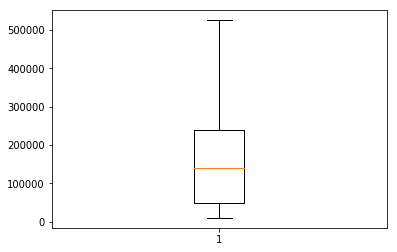

In [16]:
plt.boxplot(df['X1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be1466588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be1466c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be1466438>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be13b22e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be13b2630>],
 'means': []}

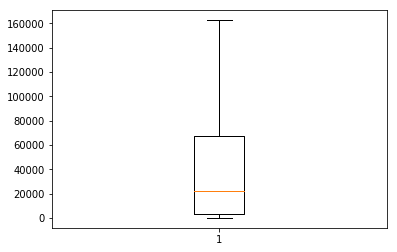

In [17]:
plt.boxplot(df['X12_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be1386940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be1386fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be13867f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be138d6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be138d9e8>],
 'means': []}

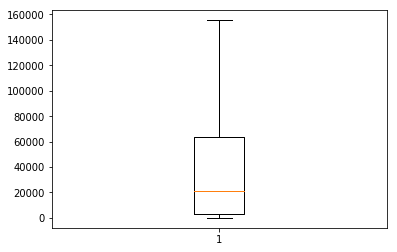

In [18]:
plt.boxplot(df['X13_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9be1363cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9be12eb3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9be1363ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9be12eba58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9be12ebda0>],
 'means': []}

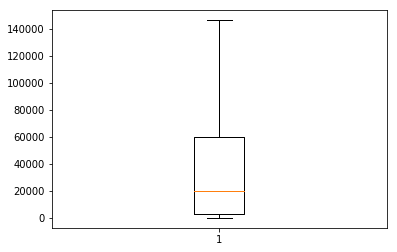

In [19]:
plt.boxplot(df['X14_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f08c6c433c8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f08c6c43a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f08c6c43278>],
 'medians': [<matplotlib.lines.Line2D at 0x7f08c6c4c128>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f08c6c4c470>],
 'means': []}

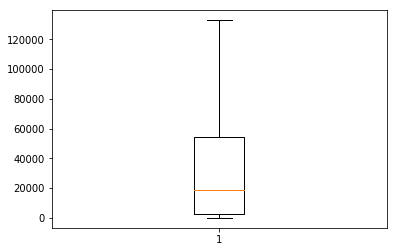

In [13]:
plt.boxplot(df['X15_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f08c6c1ae10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f08c6c234e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f08c6c1acc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f08c6c23b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f08c6c23eb8>],
 'means': []}

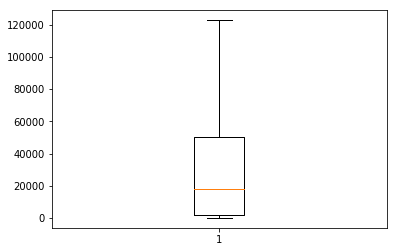

In [14]:
plt.boxplot(df['X16_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f08c8e3e2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f08c8e3e9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f08c8e3e198>],
 'medians': [<matplotlib.lines.Line2D at 0x7f08c6b7f3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f08c6b7f710>],
 'means': []}

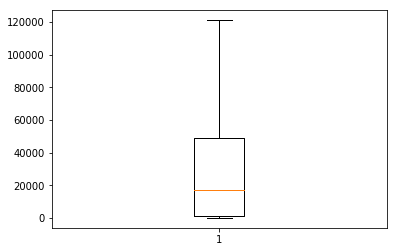

In [15]:
plt.boxplot(df['X17_abs'])

In [16]:
df.shape

(30000, 7)

In [18]:
# export new dataframe to csv
df.to_csv('../csv_files/comp2_iqr.csv')